# Import Libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
data = pd.read_csv("covid_19_clean_complete.csv")

In [3]:
#print first 5 columns 
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
#get information about the data to see which columns has nulls and other things
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


## Remove Nulls

In [6]:
#we can make it easier by just taking the columns which has nulls
Columns_has_nulls = [x for x in data.columns if data[x].isnull().sum()>0]
Columns_has_nulls

['Province/State']

In [7]:
#we can now how many nulls are they in that column
Perc_of_Non_nulls = ((data['Province/State'].isnull().sum())/49068)*100
Perc_of_Non_nulls

70.11494252873564

So there are 70% nulls in that column so its better to drop it.   

And the othere columns are fine.

In [10]:
#now lets drop that column
data = data.drop('Province/State', axis = 1 )

In [14]:
#its deleted
data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Check for outliers

In [21]:
#lets see if theres any outlier by analyzing the describe
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


We can know if there are an outlier by looking at the difference between the mean and the median.

And another way is to look if the standard deviation in high compared to the mean.

In [25]:
#lets take the numerical columns only
numeric_columns = data.select_dtypes(include='number')
numeric_columns

,Lat,Long,Confirmed,Deaths,Recovered,Active
0,33.939110,67.709953,0,0,0,0
1,41.153300,20.168300,0,0,0,0
2,28.033900,1.659600,0,0,0,0
3,42.506300,1.521800,0,0,0,0
4,-11.202700,17.873900,0,0,0,0
...,...,...,...,...,...,...
49063,0.186400,6.613100,865,14,734,117
49064,15.552727,48.516388,1691,483,833,375
49065,-11.645500,43.333300,354,7,328,19
49066,38.861000,71.276100,7235,60,6028,1147


In [27]:
# we can make a function to calculate the difference of the mean and median for each column
def calc_diff(col):
    diff = abs(data[col].mean() - data[col].median())
    return diff
list_of_diff = [x for x in numeric_columns]
Final_diff = calc_diff(list_of_diff)
Final_diff

Lat              2.200770
Long             1.782936
Confirmed    16716.904255
Deaths         882.179160
Recovered     7886.713479
Active        8059.011617
dtype: float64

In [29]:
# we can make a function to calculate the difference of the mean and std for each column
def calc_diff2(col):
    diff = abs(data[col].mean() - data[col].std())
    return diff
list_of_diff2 = [x for x in numeric_columns]
Final_diff2 = calc_diff2(list_of_diff2)
Final_diff2

Lat               3.516589
Long             46.914503
Confirmed    110415.301017
Deaths         5429.405251
Recovered     46885.205251
Active        68173.891409
dtype: float64

From both functions we can see that they both agree on that (Confirmed,Deaths,Recovered,Active) has outliers

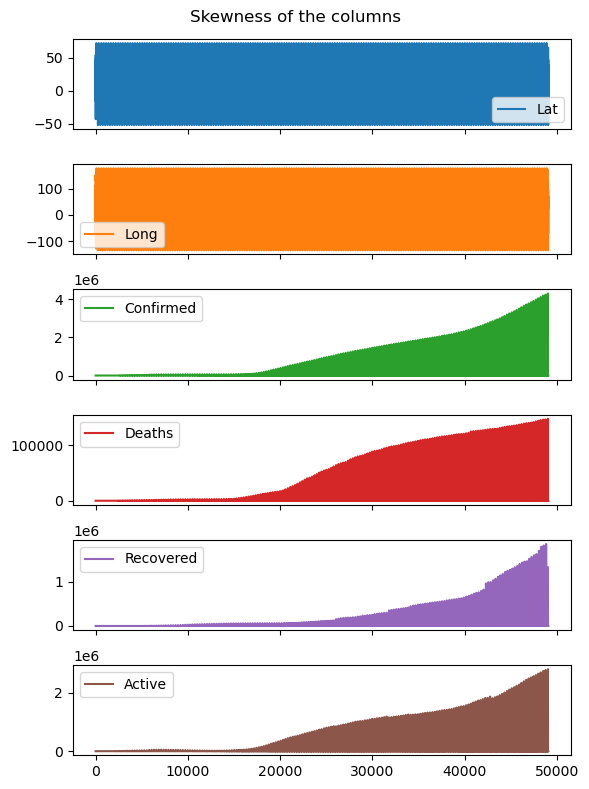

In [46]:
# We can visualize it to see the skewness , is it right or left 
data.plot(subplots=True, figsize=(6, 8), title='Skewness of the columns')
plt.tight_layout()
plt.show()

We can see that most of them are right skewness and they are the same columns we measured before

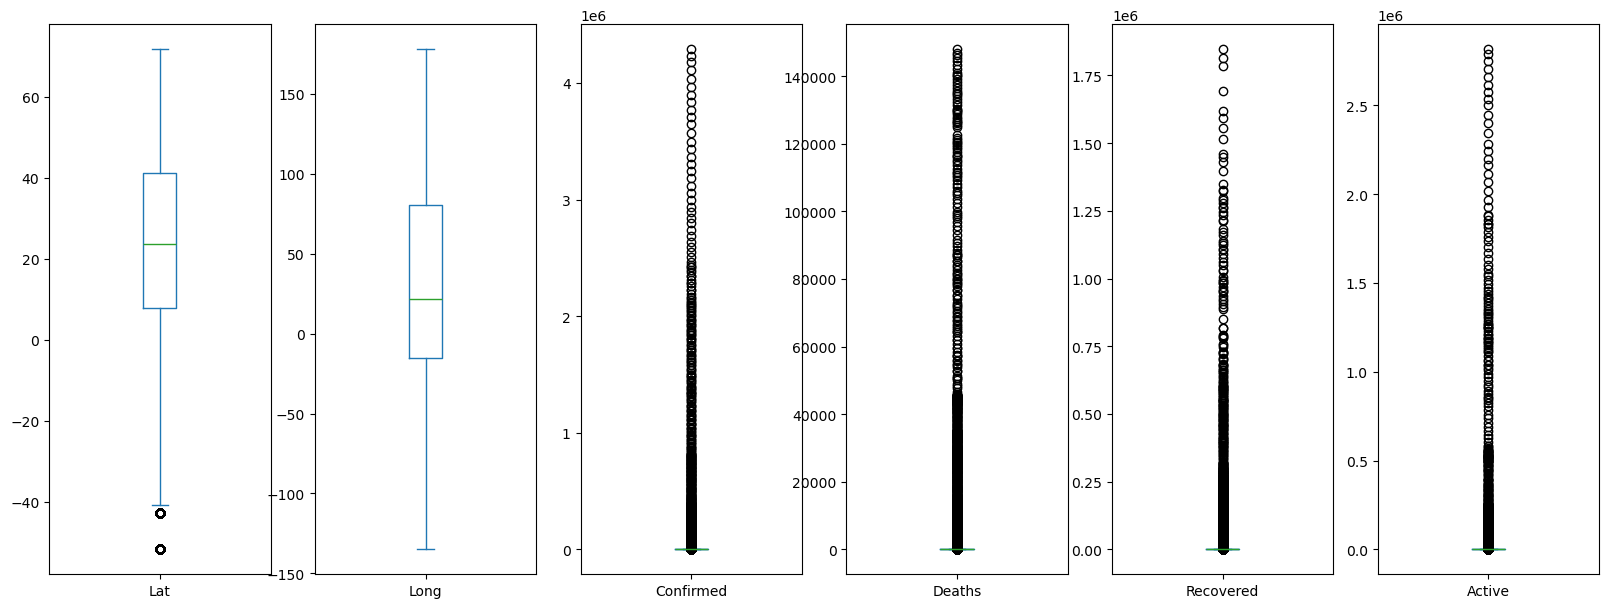

In [73]:
#we can also print the outliers using the boxplot
data.plot(kind='box', subplots=True, figsize=(20, 50), layout=(6, 6))
plt.show()

Although there are many outliers but in this specific dataset the outliers are important we can keep them till we have an error

## Checking for negative numbers

In [95]:
#checking for 
neg_nums = []
for col in numeric_columns:
    if (data[col] < 0).any():
        neg_nums.append(col)
neg_nums

['Lat', 'Long', 'Active']

For Lat and Long its normal to have negative values but in Active no

In [98]:
#lets remove the rows with negatives
data.shape

(49068, 9)

In [100]:
data = data[data['Active'] >= 0]
data.shape

(49050, 9)

Now they are removed!

## Make sure that the date is in datetime format

In [109]:
data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [114]:
data['Date'].dtype

dtype('O')

As we can see its an O which refers to object

In [121]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

C:\Users\roqay\AppData\Local\Temp\ipykernel_932\3905385719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


dtype('<M8[ns]')

So thats the datetime format

## Start the DashBoard!!

In [125]:
#save the file then go and work on it in another IDE
data.to_csv('covid_19_clean_complete.csv', index=False)